# Exploratory Data Analysis

Exploratory data analysis of the assignment dataset on heart disease classifications and surrounding contexts.

## Imports

In [1]:
# Module imports
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib as plt

import seaborn as sns


## Loading the Heart Disease dataset

<div class="alert alert-block alert-info">
    <b>Info:</b> Pandas' <tt>read_csv()</tt> function loads CSV datasets into dataframes ready for manipulation.
</div>

In [2]:
# Loading dataset from CSV file
dataset = pd.read_csv('dataset/heart-disease.csv')
dataset2 = pd.read_csv('dataset/heart-disease.csv')
# Printing the top 5 rows of the dataframe
dataset.head()

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,NaN,0


### Dictionary definitions
Defining numbers reported by feature values.

In [3]:
cad= {
    0: "Absence",
    1: "Light indications",
    2: "Detected presence",
    3: "Significant evidence",
    4: "Confirmed diagnosis"
}

chestpain = {
    1: "Typical angina",
    2: "Atypical angina",
    3: "Non-anginal pain",
    4: "Asymptomatic"
}

restingecg = {
    1: "Normal",
    2: "Having ST-T wave abnormality",
    3: "Showing left ventricular hypertrophy"
}

thal = {
    3: "Normal",
    6: "Fixed defect",
    7: "Reversible defect"
}

# Printing dictionaries
print('\nCoronary Artery Disease:\n', cad)
print('\nChest pain:\n', chestpain)
print('\nResting ECG:\n', restingecg)
print('\nThalassemia:\n', thal)


Coronary Artery Disease:
 {0: 'Absence', 1: 'Light indications', 2: 'Detected presence', 3: 'Significant evidence', 4: 'Confirmed diagnosis'}

Chest pain:
 {1: 'Typical angina', 2: 'Atypical angina', 3: 'Non-anginal pain', 4: 'Asymptomatic'}

Resting ECG:
 {1: 'Normal', 2: 'Having ST-T wave abnormality', 3: 'Showing left ventricular hypertrophy'}

Thalassemia:
 {3: 'Normal', 6: 'Fixed defect', 7: 'Reversible defect'}


## Exploring the Heart Disease dataset

### Dataset information

In [4]:
# Describing the dataset
print("\nGeneral info\n")
print(dataset.info())

print("\nStatistics (of numeric features)\n")
stats = dataset.describe()
dataset.describe()


General info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           920 non-null    float64
 1   Gender                        920 non-null    float64
 2   Chest pain type               920 non-null    float64
 3   Resting blood pressure        861 non-null    float64
 4   Serum cholesterol             890 non-null    float64
 5   Fasting blood sugar           830 non-null    float64
 6   Resting electrocardiographic  918 non-null    float64
 7   Maximum heart rate            865 non-null    float64
 8   Exercise induced angina       865 non-null    float64
 9   ST depression                 858 non-null    float64
 10  ST segment                    611 non-null    float64
 11  Number of major vessels       309 non-null    float64
 12  Thal                          434 non-null    flo

,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
# Describing the dataset
print("\nInfo about the class\n")
print(dataset['class'].describe(),"\n")
print(dataset['class'].value_counts())


Info about the class

count    920.000000
mean       0.995652
std        1.142693
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: class, dtype: float64 

0    411
1    265
2    109
3    107
4     28
Name: class, dtype: int64


### Missing values

Age                             920
Gender                          920
Chest pain type                 920
Resting blood pressure          861
Serum cholesterol               890
Fasting blood sugar             830
Resting electrocardiographic    918
Maximum heart rate              865
Exercise induced angina         865
ST depression                   858
ST segment                      611
Number of major vessels         309
Thal                            434
class                           920
dtype: int64
Number of null values per feature:

Age                               0
Gender                            0
Chest pain type                   0
Resting blood pressure           59
Serum cholesterol                30
Fasting blood sugar              90
Resting electrocardiographic      2
Maximum heart rate               55
Exercise induced angina          55
ST depression                    62
ST segment                      309
Number of major vessels         611
Thal           

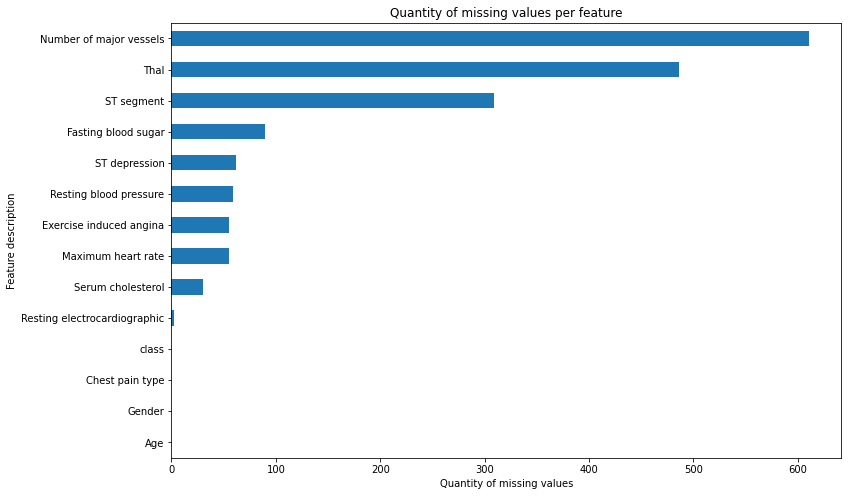

In [6]:
# Printing out number of present values per feature
print(dataset.count())

# Printing out number of null values per feature
print('Number of null values per feature:\n');
miss = dataset.isnull().sum()
print(miss);
bc = miss.sort_values().plot(kind='barh', title='Quantity of missing values per feature', figsize=(12, 8), rot=0);
bc.set_xlabel("Quantity of missing values")
bc.set_ylabel("Feature description")

# Printing total null values
print('\nTotal number of null values:\n');
print(dataset.isnull().sum().sum());



#### Zero values

In [7]:
print("Null values before zero purge:\n", dataset2['Serum cholesterol'].isnull().value_counts())

# Removing zero values and replacing with null for later imputation
dataset2['Serum cholesterol'] = dataset2['Serum cholesterol'].replace(0, np.nan)

print("\nNull values after zero purge:\n", dataset2['Serum cholesterol'].isnull().value_counts())

Null values before zero purge:
 False    890
True      30
Name: Serum cholesterol, dtype: int64

Null values after zero purge:
 False    718
True     202
Name: Serum cholesterol, dtype: int64


### Duplicate rows

In [8]:
# Printing number of duplicate rows
print('\nNumber of duplicated rows:\n')
print(dataset.duplicated().value_counts());

# Displaying duplicated rows
duplicate_rows = dataset[dataset.duplicated()];
print('\nDuplicated rows:')
duplicate_rows


Number of duplicated rows:

False    918
True       2
dtype: int64

Duplicated rows:


,Age,Gender,Chest pain type,Resting blood pressure,Serum cholesterol,Fasting blood sugar,Resting electrocardiographic,Maximum heart rate,Exercise induced angina,ST depression,ST segment,Number of major vessels,Thal,class
187,58.0,1.0,3.0,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2
605,49.0,0.0,2.0,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0


### Outliers

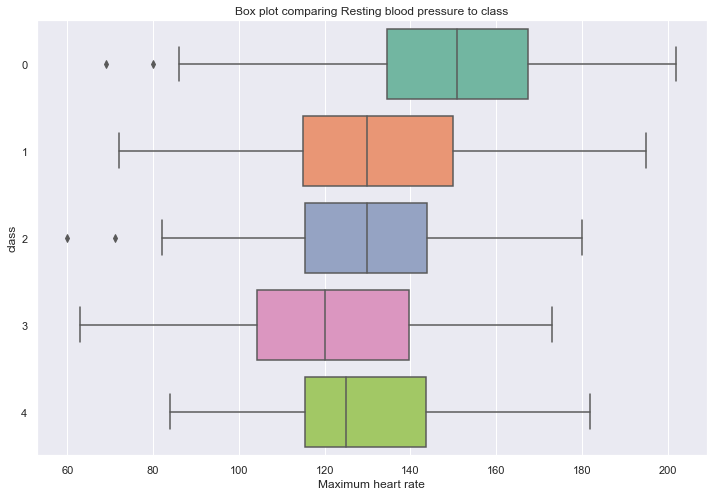

In [9]:
sns.set(rc = {'figure.figsize':(12,8)})

# Box plot comparing Maximum heart rate to class
sns.boxplot(data=dataset, orient='h', palette='Set2', x='Maximum heart rate', y='class').set_title('Box plot comparing Resting blood pressure to class');

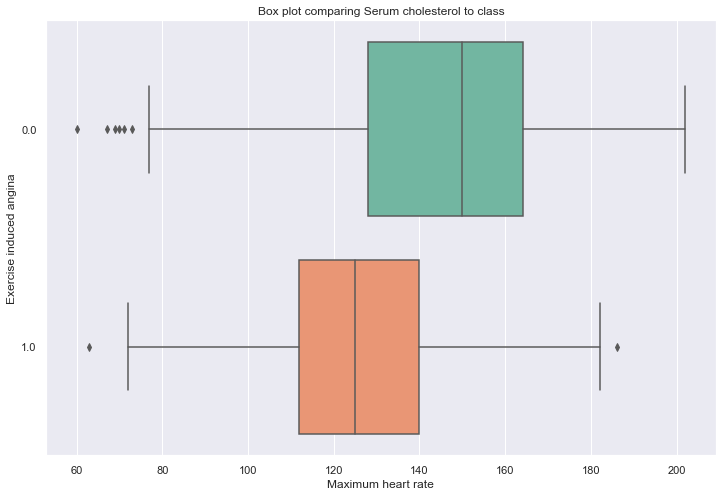

In [10]:
sns.set(rc = {'figure.figsize':(12,8)})

# Box plot comparing Resting blood pressure to Exercise induced angina
sns.boxplot(data=dataset, orient='h', palette='Set2', x='Maximum heart rate', y='Exercise induced angina').set_title('Box plot comparing Serum cholesterol to class');

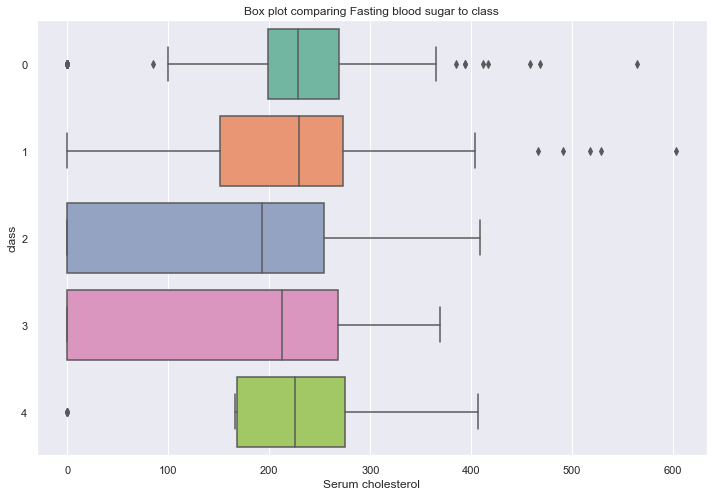

In [11]:
sns.set(rc = {'figure.figsize':(12,8)})

# Box plot comparing Serum cholesterol to class
sns.boxplot(data=dataset, orient='h', palette='Set2', x='Serum cholesterol', y='class').set_title('Box plot comparing Fasting blood sugar to class');

### Plotting class distribution

Text(0, 0.5, 'Total diagnosis count')

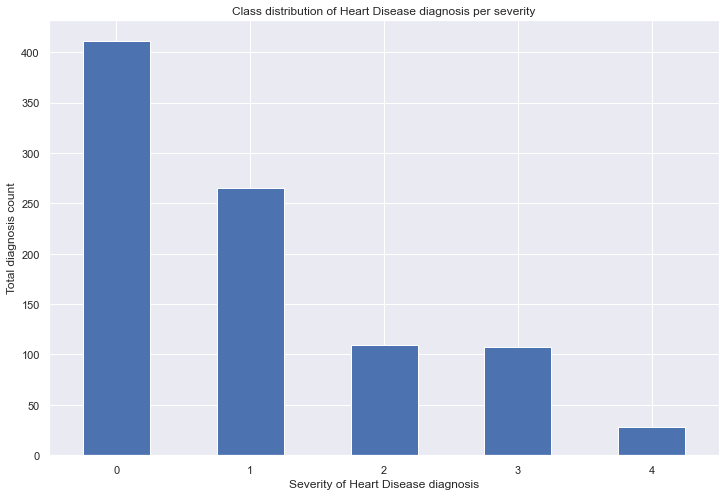

In [12]:
# Plotting a bar chart showing class distribution
bc = dataset['class'].value_counts().plot(kind='bar', title='Class distribution of Heart Disease diagnosis per severity', figsize=(12, 8), rot=0);
bc.set_xlabel("Severity of Heart Disease diagnosis")
bc.set_ylabel("Total diagnosis count")

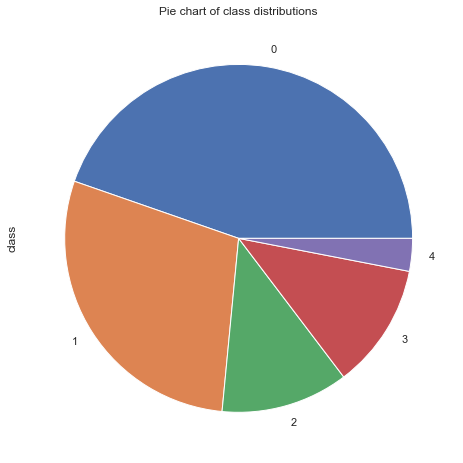

In [13]:
# Plotting a pie chart showing class distribution
dataset['class'].value_counts().plot(kind='pie', title='Pie chart of class distributions', figsize=(12, 8));

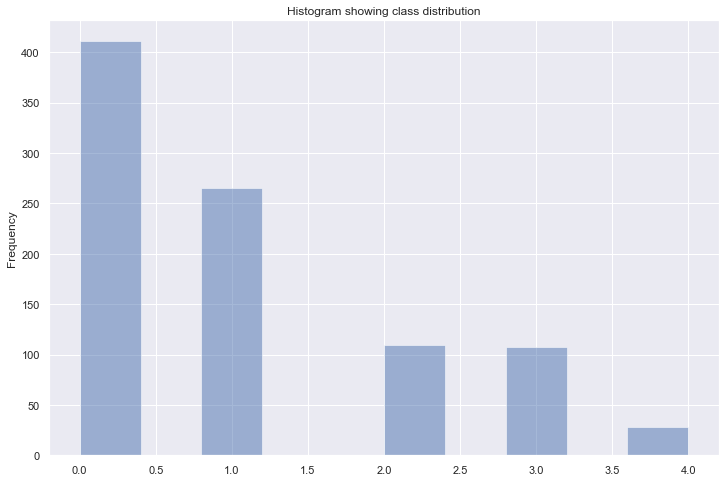

In [14]:
# Plotting a histogram to show class distribution
dataset['class'].plot(kind='hist', title='Histogram showing class distribution', alpha=0.5, figsize=(12, 8));

### Feature data
Showing metrics on all features as a whole.

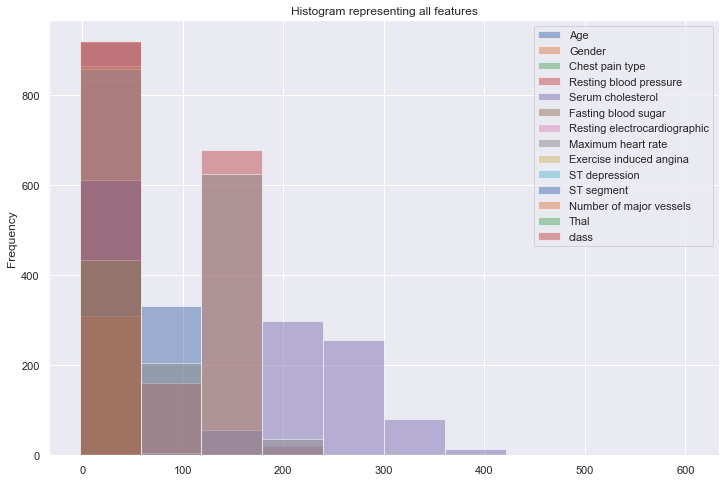

In [15]:
# Plotting a histogram for all features
dataset.plot(kind='hist', alpha=0.5, title='Histogram representing all features', figsize=(12, 8));

In [16]:
# Describing specific features
print('\nDescription of Age:\n')
print(dataset['Age'].describe(),"\n")

print('\nDescription of Gender:\n')
print(dataset['Gender'].describe(),"\n")
genders = dataset.Gender.value_counts()
print('Frequency of each Gender:\n')
print(genders, '\n')

print('\nDescription of Chest pain type:\n')
print(dataset['Chest pain type'].describe(),"\n")

print('\nDescription of Thal:\n')
print(dataset['Thal'].describe(),"\n")


Description of Age:

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64 


Description of Gender:

count    920.000000
mean       0.789130
std        0.408148
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Gender, dtype: float64 

Frequency of each Gender:

1.0    726
0.0    194
Name: Gender, dtype: int64 


Description of Chest pain type:

count    920.000000
mean       3.250000
std        0.930969
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: Chest pain type, dtype: float64 


Description of Thal:

count    434.000000
mean       5.087558
std        1.919075
min        3.000000
25%        3.000000
50%        6.000000
75%        7.000000
max        7.000000
Name: Thal, dtype: float64 



### Visualising feature data
Trying to find correlations between specific features in the dataset.

<div class="alert alert-block alert-info">
<b>Note:</b> Relevant features still need to be identified within the dataset to be plotted in scatter matrices..
</div>

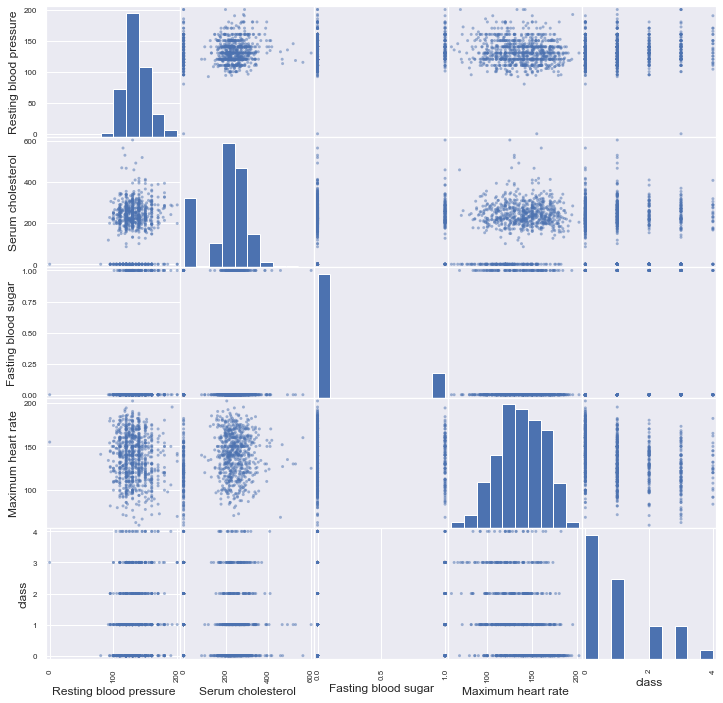

In [17]:
# Plotting a Pandas scatter matrix to find correlation in heart and blood metrics
scatter_matrix(dataset[['Resting blood pressure', 'Serum cholesterol', 'Fasting blood sugar', 'Maximum heart rate', 'class']], alpha=0.5, figsize=(12, 12), diagonal='hist');

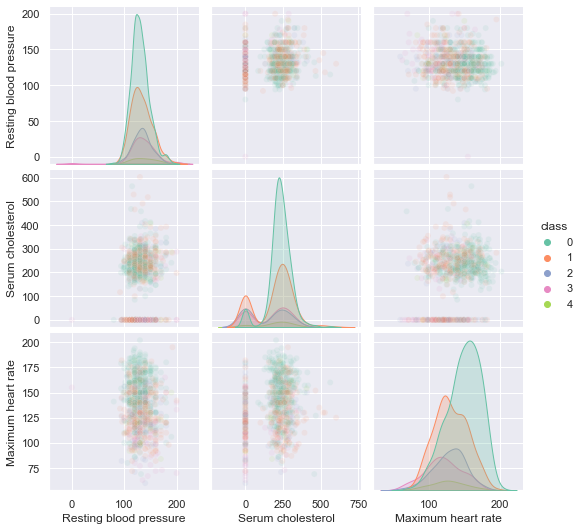

In [18]:
sns.pairplot(dataset, hue='class', palette='Set2', plot_kws={'alpha':0.1},
             vars=['Resting blood pressure', 'Serum cholesterol', 'Maximum heart rate']);

### Correlation Analysis


                                    Age    Gender  Chest pain type  \
Age                           1.000000  0.061527         0.173435   
Gender                        0.061527  1.000000         0.185418   
Chest pain type               0.173435  0.185418         1.000000   
Resting blood pressure        0.259390  0.016708         0.042221   
Serum cholesterol            -0.037350 -0.174794        -0.079165   
Fasting blood sugar           0.231570  0.089191         0.047622   
Resting electrocardiographic  0.234089 -0.004602         0.050688   
Maximum heart rate           -0.348333 -0.183517        -0.374185   
Exercise induced angina       0.202938  0.181420         0.443067   
ST depression                 0.287774  0.105406         0.299928   
ST segment                    0.151676  0.124071         0.241881   
Number of major vessels       0.391373  0.105801         0.244589   
Thal                          0.136612  0.357721         0.345791   
class                         0.

<AxesSubplot:>

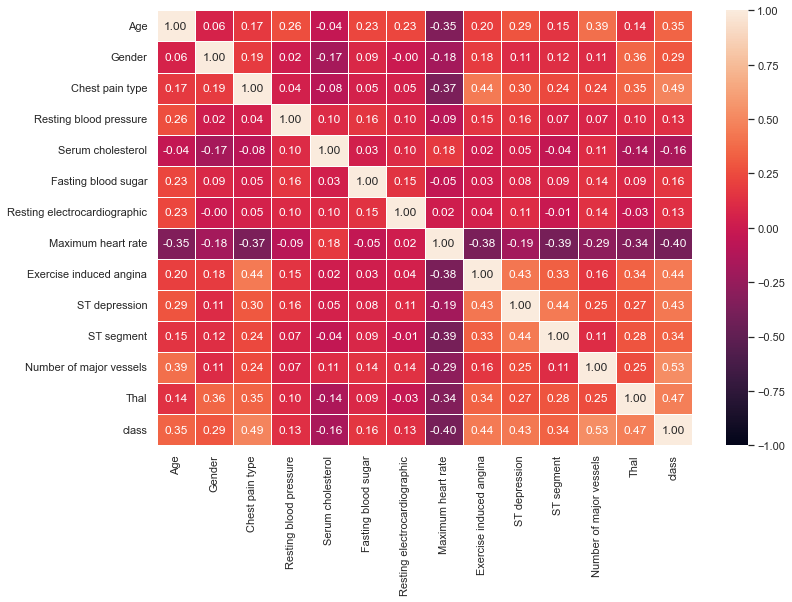

In [20]:
# Using Sparman's (non-linear relationship) - doesn't assume normal distribution
corr = dataset.corr(method='spearman')
print ("\n",corr)

# Correlation matrix - Seaborn heatmap
sns.heatmap(data=corr, annot=True, linewidths=.5, fmt= '.2f', vmin=-1, vmax=1)